In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

In [2]:
import random, time

np.random.seed(1001)
random.seed(1001)

# Problem description
section 4.2 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution

In [4]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 100
start_time = time.time()
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, print_freq=10)
print(f"elapsed time = {time.time() - start_time}")

/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=223.021469758155, L=-840063.2757961305, U=-3749.923061852199, L0=-840063.2757961305
k=10, rel_gap=0.0404662489661043, L=-4377.693880308359, U=-4207.4347771092125, L0=-4377.693880308359
k=20, rel_gap=0.025352765568767, L=-4331.804744157706, U=-4224.696991727367, L0=-4331.804744157706
rho=247.35591973486356
k=30, rel_gap=0.01919652123556546, L=-4311.968653399846, U=-4230.752915220387, L0=-4311.968653399846
k=40, rel_gap=0.0122516226088991, L=-4302.686218419238, U=-4250.6093567228145, L0=-4302.686218419238
k=50, rel_gap=0.008813332300796577, L=-4296.678032532045, U=-4259.140809264117, L0=-4296.678032532045
k=60, rel_gap=0.006792530377125369, L=-4293.102812730117, U=-4264.138522285224, L0=-4293.102812730117
k=70, rel_gap=0.005288185054937472, L=-4290.762839029526, U=-4268.19185067319, L0=-4290.762839029526
k=80, rel_gap=0.0047019935578468414, L=-4289.24434593731, U=-4269.170732655018, L0=-4289.24434593731
k=90, rel_gap=0.0040116336288732735, L=-4287.720544218732, U=-4270.58850

In [6]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-4286.970745471123, -4271.907604312541)

# Centralized solution

In [7]:
h_cvx, x_cvx = ob.cvx_resource_allocation(params=params, R=R)

In [8]:
h_cvx, prob.upper_bnd[-1]

(-4278.68493859097, -4271.907604312541)

# Plot

i=33, omega_k=0.01685152241020332, omega_true=0.009709404008015577
i=47, omega_k=0.009513713491593708, omega_true=0.004943273708807813


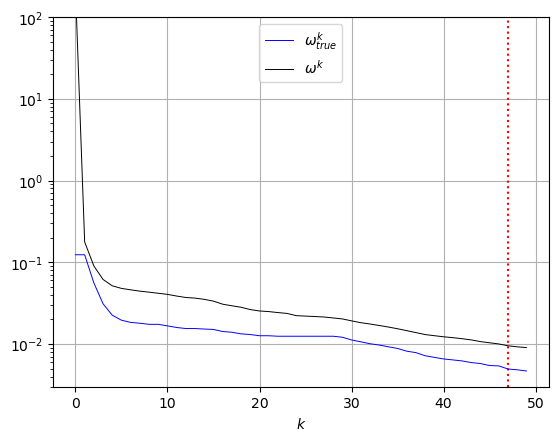

In [17]:
ob.plot_true_rel_gap_uk(y_min=3e-3, y_max=1e2, lk = prob.lower_bnd[:51], uk = prob.upper_bnd[:51], h_true = h_cvx, file_name='ra_osbdo_50_bounds.pdf')